In [1]:
import pandas as pd
import sys
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:\iti ai\machine2\CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
dff=df.drop('CUST_ID',axis=1)

# plotting histogram for knowing the distribution of the data

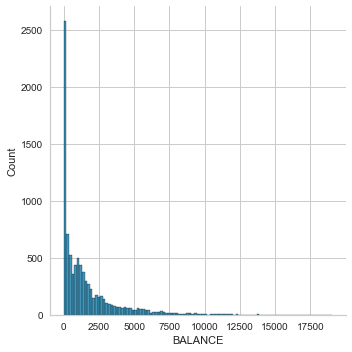

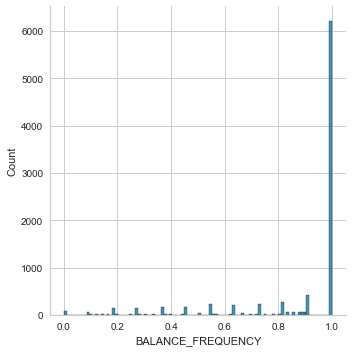

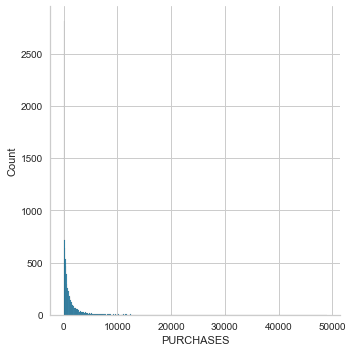

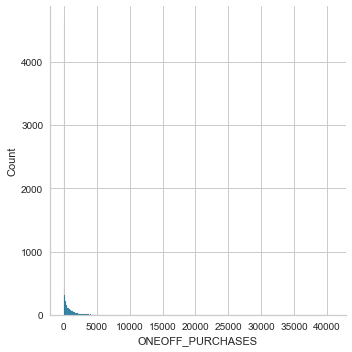

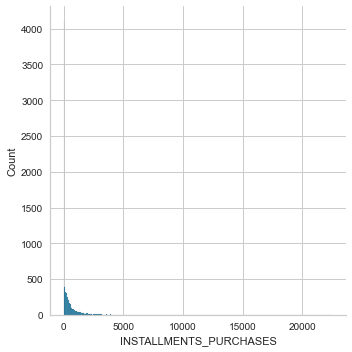

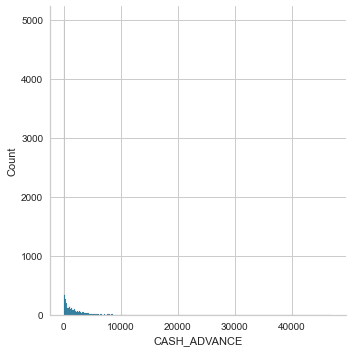

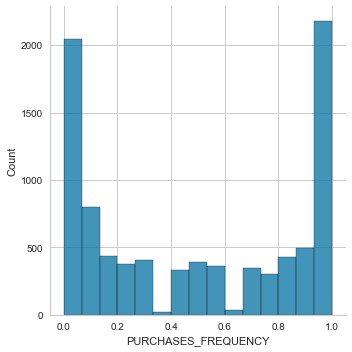

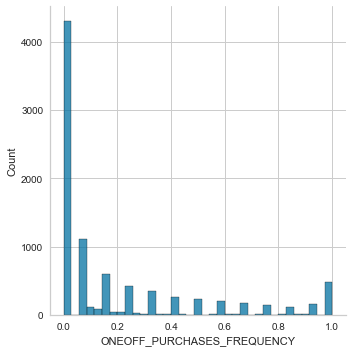

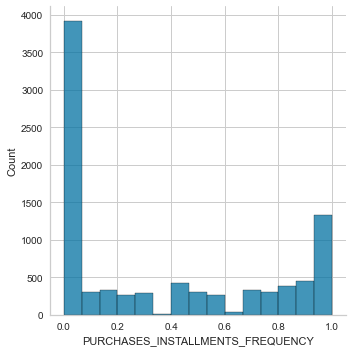

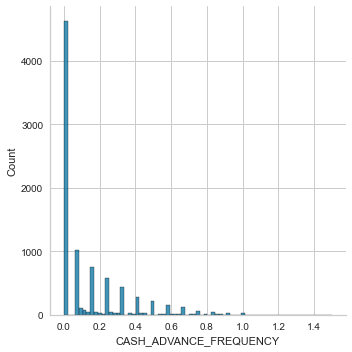

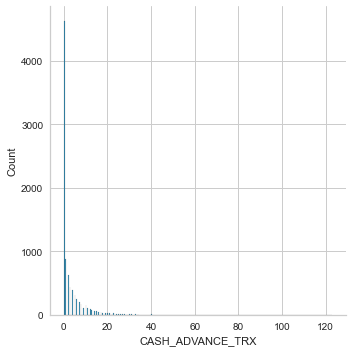

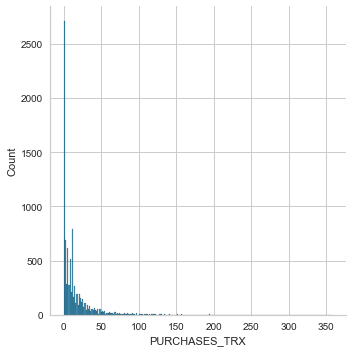

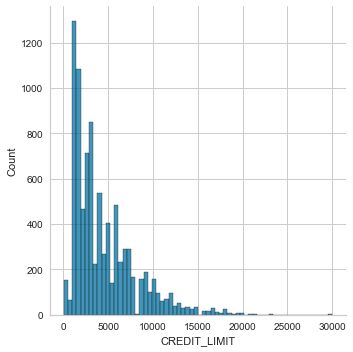

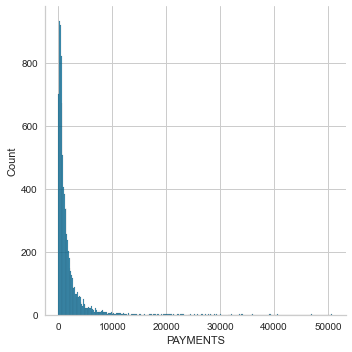

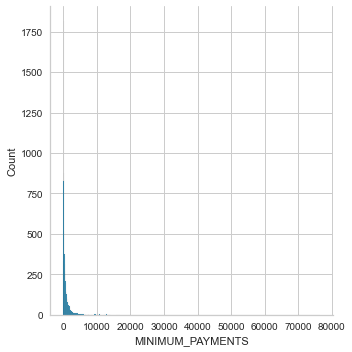

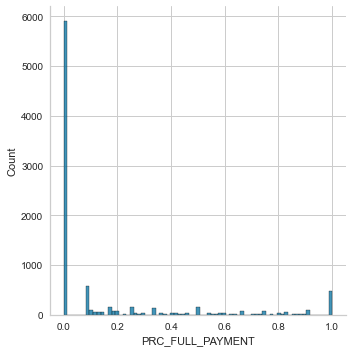

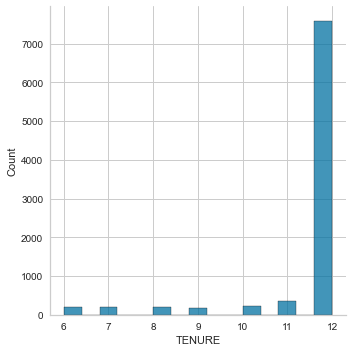

In [9]:
for col in dff:
    sns.displot(data=dff, x=col)

# Imputing missing data in column 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'

In [10]:
dff['CREDIT_LIMIT'].fillna(value=dff['CREDIT_LIMIT'].median(), inplace=True)
dff['CREDIT_LIMIT'].isna().sum()

0

In [11]:
dff['MINIMUM_PAYMENTS'].fillna(value=dff['MINIMUM_PAYMENTS'].median(), inplace=True)
dff['MINIMUM_PAYMENTS'].isna().sum()

0

<AxesSubplot: >

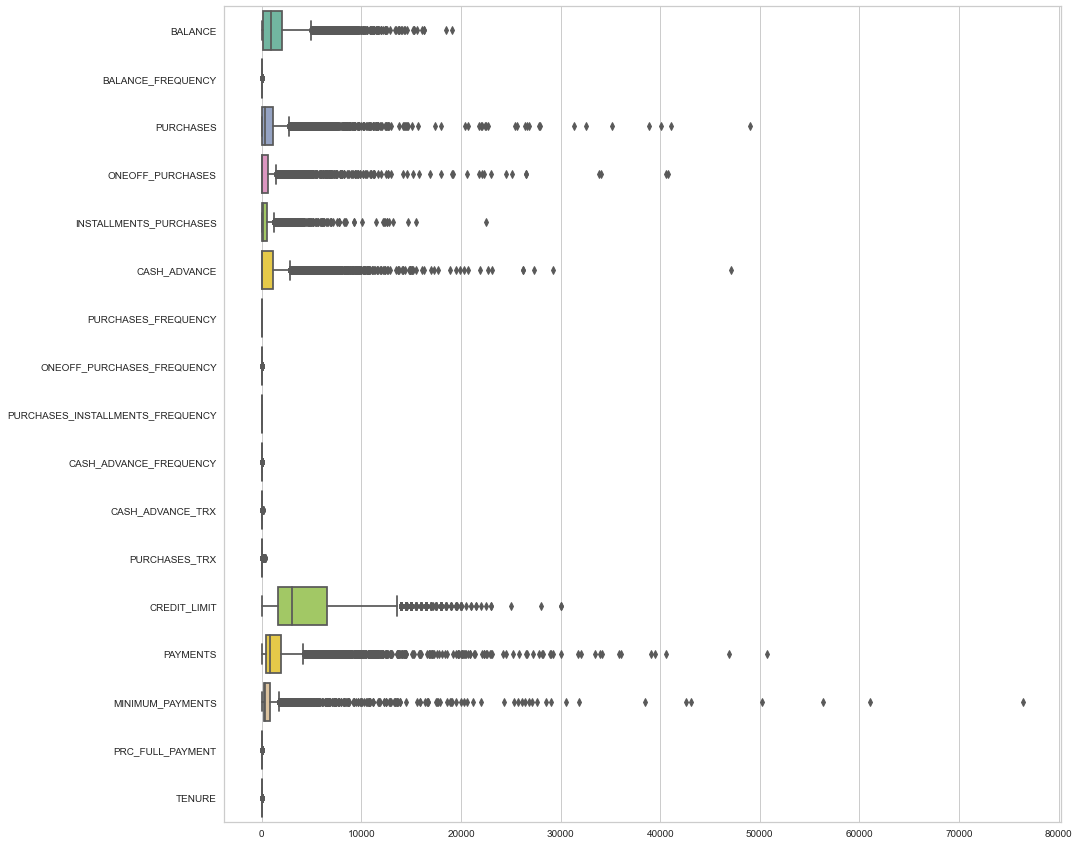

In [12]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dff, orient="h", palette="Set2")

In [13]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
scaled = scaler.fit_transform(dff)
scaled.shape

(8950, 17)

In [14]:
dff.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [15]:
scaled_df = pd.DataFrame(scaled, columns=dff.columns)
scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-4.445854e-17,-4.699903e-16,1.238488e-16,6.986342e-17,7.343598e-17,1.381390e-16,6.668781e-17,-2.540488e-17,-7.462683e-17,-9.804696e-17,-1.254366e-16,-2.889805e-16,-5.462049e-16,-5.716098e-17,-6.668781e-16,-6.986342e-17,7.621464e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-2.120305e+00,-1.997716e+00,-1.505149e+00,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.278866e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-1.387624e+00,-4.573150e+00,-2.782085e+00,-5.869902e+00,-6.778889e-01,-2.526612e+00
25%,-8.168070e-01,-5.989922e-01,-6.547989e-01,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.015926e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-8.727179e-01,-8.805898e-01,-6.089046e-01,-6.437446e-01,-6.778889e-01,4.222524e-01
50%,1.516813e-01,6.286119e-01,1.607696e-01,2.375163e-01,3.611963e-01,-9.445384e-01,1.196567e-01,-9.222973e-02,-2.738452e-01,-8.832040e-01,-9.058009e-01,1.432569e-01,-1.296595e-01,-6.428417e-02,-1.158118e-01,-6.778889e-01,4.222524e-01
75%,7.179130e-01,6.286119e-01,7.102506e-01,9.909450e-01,9.060999e-01,1.059052e+00,1.050283e+00,9.780771e-01,1.069884e+00,1.016910e+00,1.044342e+00,7.291175e-01,8.300851e-01,5.694526e-01,6.658903e-01,8.541173e-01,4.222524e-01
max,2.731227e+00,6.286119e-01,3.559070e+00,1.959134e+00,2.212015e+00,1.729923e+00,1.218860e+00,1.732554e+00,1.377136e+00,1.902718e+00,1.921254e+00,2.838620e+00,2.851804e+00,4.568553e+00,4.036562e+00,1.873638e+00,4.222524e-01


<AxesSubplot: >

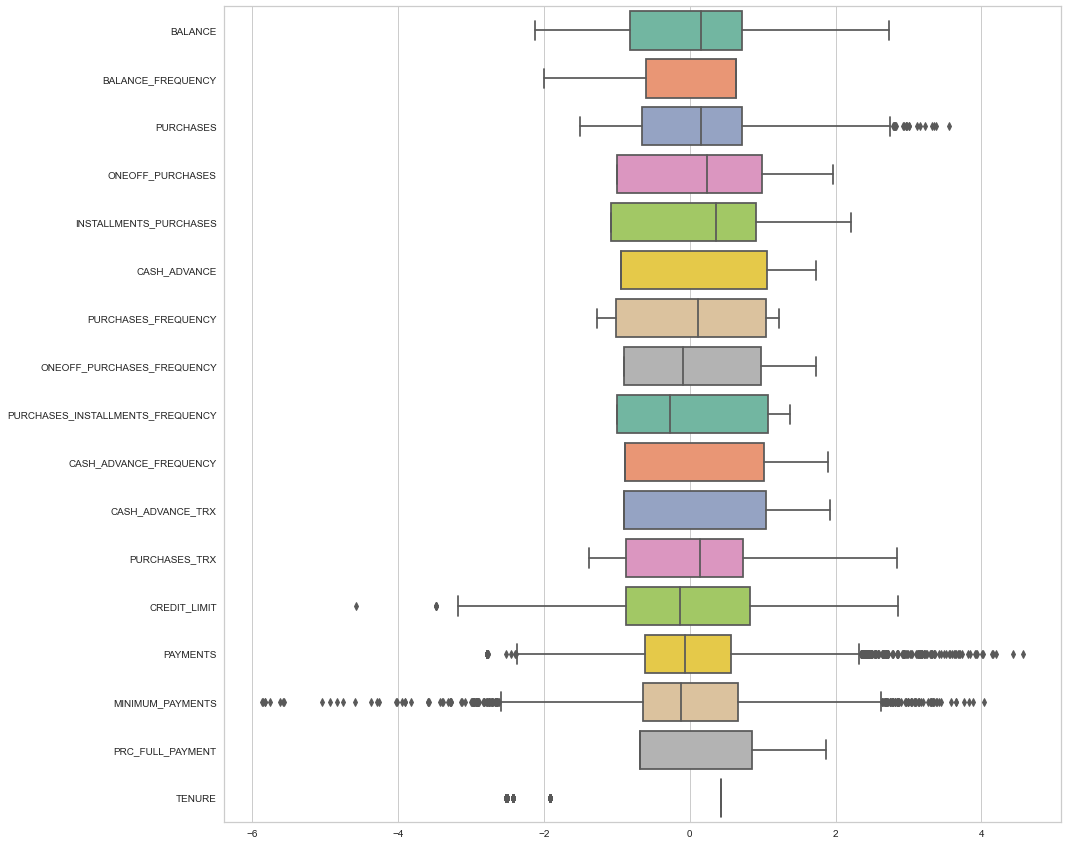

In [16]:
plt.figure(figsize=(15,15))
sns.boxplot(data=scaled_df, orient="h", palette="Set2")

# Kmeans

In [17]:
def kmeans(dataset,k):
    model = KMeans(n_clusters=k, random_state=42) 
    kmeans_d = model.fit(dataset)
    return kmeans_d.labels_,kmeans_d.cluster_centers_

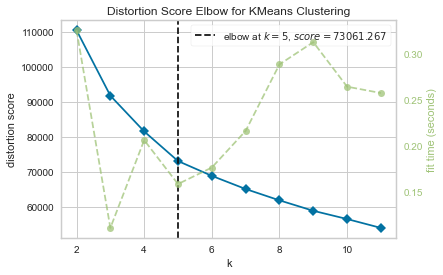

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#Elbow method
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(scaled_df) 
visualizer.show() 

In [19]:
labels_kmeans,centroids=kmeans(scaled_df,5)
np.set_printoptions(threshold=sys.maxsize)
print(labels_kmeans)
print(Counter(labels_kmeans))

[1 0 4 4 4 1 2 1 4 4 1 4 2 2 0 3 0 1 2 1 1 3 1 3 0 1 0 1 3 1 3 3 3 4 2 0 0
 3 0 3 0 3 4 0 2 3 0 0 2 4 3 2 0 4 1 4 0 2 0 3 4 4 0 4 3 2 0 0 2 4 3 3 0 2
 4 2 2 1 0 3 1 0 1 1 3 2 3 3 0 0 3 3 0 4 4 0 4 0 1 0 4 1 2 1 0 3 1 0 3 3 2
 0 3 0 2 2 1 0 1 0 3 4 2 0 0 2 0 2 0 0 4 2 1 3 1 2 2 3 2 3 4 0 0 2 2 4 1 0
 2 3 3 2 1 3 2 1 3 0 2 4 0 0 2 4 1 0 1 2 1 2 0 3 1 0 3 0 3 0 2 1 2 4 3 4 2
 1 0 2 4 4 4 4 4 2 4 2 2 2 4 0 4 3 1 3 2 1 3 3 3 4 3 2 0 4 1 4 3 4 3 2 2 2
 4 2 2 4 2 2 0 2 2 1 3 4 3 4 3 3 1 2 3 2 2 4 2 1 2 1 3 2 3 1 1 2 0 1 4 3 2
 0 4 2 2 3 2 2 2 4 4 3 2 0 2 2 3 4 4 4 1 3 2 3 2 2 0 0 0 3 4 0 2 3 4 0 1 2
 0 0 4 4 3 2 0 4 0 2 2 2 0 4 2 3 2 0 0 0 0 4 1 1 0 3 0 4 0 1 2 3 0 2 0 4 2
 2 0 0 1 2 1 2 0 3 4 4 2 1 2 2 3 1 0 2 3 4 4 2 2 3 0 0 2 0 4 3 0 1 4 2 0 0
 2 3 0 2 1 4 2 1 4 0 3 0 3 4 2 0 4 0 1 1 4 2 3 3 1 0 2 3 0 3 2 1 3 2 0 2 4
 0 0 2 0 2 1 0 1 2 4 2 2 3 3 0 0 2 3 3 0 0 0 0 0 3 4 0 0 3 3 3 0 3 4 0 0 1
 2 3 2 4 0 1 4 2 3 3 3 1 1 2 3 2 2 2 2 3 0 0 2 1 3 4 3 0 2 0 1 2 3 2 0 4 1
 2 0 0 2 2 0 2 3 2 3 0 2 

In [20]:
silhouette_score(scaled_df,labels_kmeans)

0.24249288974637523

# Agglomerative

In [21]:
def dendo(data,method,metric):
    plt.figure(figsize=(10, 7))
    plt.title("Counters Dendograms")
    return shc.dendrogram(shc.linkage(y=data , method=method,metric=metric),orientation='top')

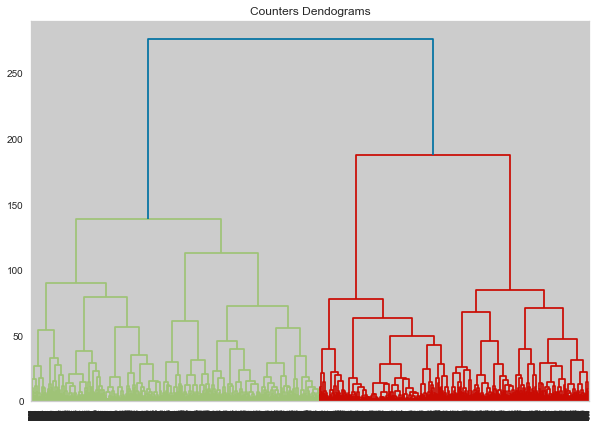

In [22]:
dend=dendo(scaled_df,'ward','euclidean')

In [23]:
def Agglomerative(n_clus,linkage,affinity,d):
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = affinity, linkage = linkage)
    y_hc = hc.fit_predict(d)
    return(y_hc)

In [24]:
y_hc=Agglomerative(3,'ward','euclidean',scaled_df)
y_hc

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1,

In [25]:
print(Counter(y_hc))

Counter({0: 4633, 1: 2226, 2: 2091})


In [26]:
silhouette_score(scaled_df, y_hc, metric='euclidean')

0.22025948389041475

# DBSCAN

In [27]:
def dbscan(data):
    for i in np.arange (1.5,5, 0.1):
        for j in range (25,44):
            clusters = DBSCAN(eps = i, min_samples = j).fit(data)
            if len(set(clusters.labels_))!=1:
                print(f"eps is {i}, min_sam is {j} ")
                #print(clusters.labels_)
                print(Counter(clusters.labels_))
                print(silhouette_score(data,clusters.labels_))
                print("\n")

In [28]:
dbscan(scaled_df)
#best: eps is1.7000000000000002, min_sam is 25
# silhouette_score:0.07320169973513564

eps is 1.5, min_sam is 25 
Counter({0: 3343, -1: 2322, 1: 2117, 3: 503, 2: 312, 5: 200, 4: 153})
0.023141064570001903


eps is 1.5, min_sam is 26 
Counter({0: 3328, -1: 2354, 1: 2110, 3: 498, 2: 312, 5: 199, 4: 149})
0.021590327087184946


eps is 1.5, min_sam is 27 
Counter({0: 3325, -1: 2382, 1: 2095, 3: 491, 2: 311, 5: 197, 4: 149})
0.020688249704143152


eps is 1.5, min_sam is 28 
Counter({0: 3293, -1: 2437, 1: 1869, 3: 484, 2: 311, 4: 197, 6: 193, 5: 148, 7: 18})
-0.026351012583173825


eps is 1.5, min_sam is 29 
Counter({0: 3267, -1: 2478, 1: 1861, 3: 481, 2: 311, 4: 195, 6: 193, 5: 147, 7: 17})
-0.02529586983894818


eps is 1.5, min_sam is 30 
Counter({0: 3257, -1: 2528, 1: 1860, 3: 475, 2: 306, 6: 189, 4: 188, 5: 147})
0.015537890604501343


eps is 1.5, min_sam is 31 
Counter({0: 3251, -1: 2556, 1: 1851, 3: 470, 2: 306, 6: 188, 4: 182, 5: 146})
0.013979764292734736


eps is 1.5, min_sam is 32 
Counter({0: 3191, -1: 2581, 1: 1843, 3: 469, 2: 306, 6: 187, 4: 181, 5: 146, 7: 46})
-

0.07331420500997093


eps is 1.8000000000000003, min_sam is 35 
Counter({1: 3828, 0: 3045, -1: 1515, 2: 361, 3: 201})
0.07245870112632129


eps is 1.8000000000000003, min_sam is 36 
Counter({1: 3820, 0: 3038, -1: 1552, 2: 361, 3: 179})
0.07035299679826207


eps is 1.8000000000000003, min_sam is 37 
Counter({1: 3818, 0: 3034, -1: 1558, 2: 361, 3: 179})
0.07033877170039159


eps is 1.8000000000000003, min_sam is 38 
Counter({1: 3815, 0: 3031, -1: 1565, 2: 360, 3: 179})
0.07019068793700273


eps is 1.8000000000000003, min_sam is 39 
Counter({1: 3804, 0: 3019, -1: 1597, 2: 351, 3: 179})
0.06930945952216269


eps is 1.8000000000000003, min_sam is 40 
Counter({1: 3803, 0: 3012, -1: 1608, 2: 349, 3: 178})
0.06893074827994165


eps is 1.8000000000000003, min_sam is 41 
Counter({1: 3801, 0: 3003, -1: 1625, 2: 343, 3: 178})
0.06708248198402354


eps is 1.8000000000000003, min_sam is 42 
Counter({1: 3796, 0: 2985, -1: 1648, 2: 343, 3: 178})
0.06688405829549765


eps is 1.8000000000000003, min_sam

KeyboardInterrupt: 

In [29]:
from kneed import KneeLocator
def get_best_eps(data,k):
    
    nn = NearestNeighbors()

    nn.fit(data)

    distances, neighbors = nn.kneighbors(data)
    
    # sort the distances
    distances = np.sort(distances[:, k], axis = 0)
    
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")

<Figure size 360x360 with 0 Axes>

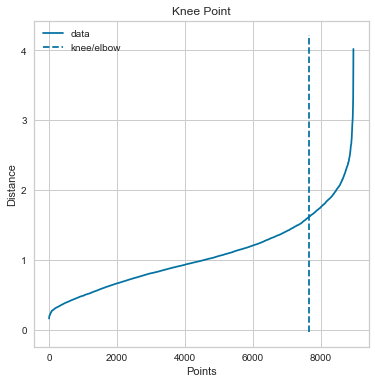

In [30]:
get_best_eps(scaled_df,4)

**GaussianMixture**

In [54]:
def gaussian_mixture_k(data):
    
    n_range = range(2,11)

    # Create empty lists to store the BIC and AIC values
    bic_score = []
    aic_score = []

    # Loop through the range and fit a model
    for n in n_range:
        gm = GaussianMixture(n_components=n, 
                             random_state=123, 
                             n_init=10)
        gm.fit(data)

        # Append the BIC and AIC to the respective lists
        bic_score.append(gm.bic(data))
        aic_score.append(gm.aic(data))

    # Plot the BIC and AIC values together
    fig, ax = plt.subplots(figsize=(12,8),nrows=1)
    ax.plot(n_range, bic_score, '-o', color='orange')
    ax.plot(n_range, aic_score, '-o', color='green')
    ax.set(xlabel='Number of Clusters', ylabel='Score')
    ax.set_xticks(n_range)
    ax.set_title('BIC and AIC Scores Per Number Of Clusters')

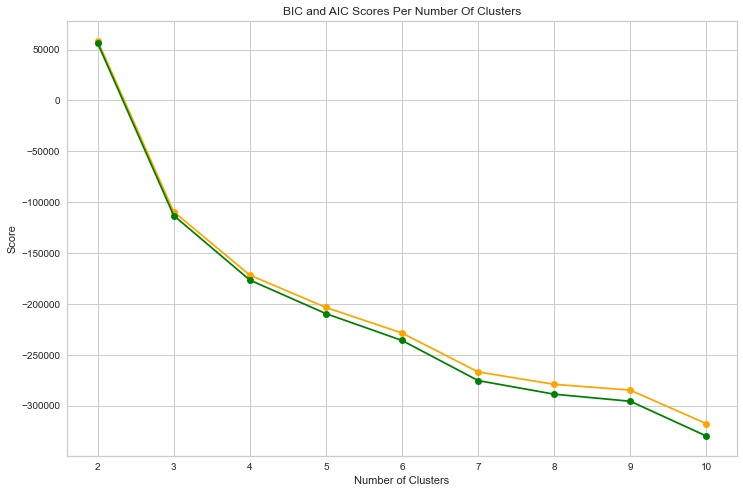

In [55]:
gaussian_mixture_k(scaled_df)

In [71]:
def gaussian_mixture(data,k):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    print(Counter(labels))
    print(silhouette_score(data,labels))
    return labels

In [72]:
labels=gaussian_mixture(scaled_df,5)

Counter({0: 2825, 1: 1961, 3: 1923, 2: 1799, 4: 442})
0.18656233872049163


# pca

In [31]:
scaler =StandardScaler()

features =scaler.fit(dff)
features =features.transform(dff)
s_df =pd.DataFrame(features,columns=dff.columns)
s_df.isna().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
X=s_df.values
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()


,PCA1,PCA2
0,-1.683651,-1.072242
1,-1.134094,2.509137
2,0.969392,-0.383604
3,-0.888222,0.004652
4,-1.600023,-0.683797


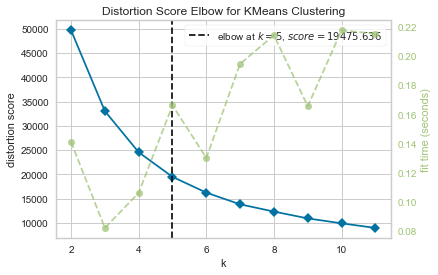

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(reduced_X) 
visualizer.show()

**Kmeans_pca**

In [34]:
kmeans(reduced_X,5)

(array([4, 0, 1, 4, 4, 1, 3, 1, 1, 4, 1, 4, 1, 1, 4, 0, 4, 1, 1, 1, 1, 3,
        1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 1, 3, 4, 0, 3, 0, 0, 4, 1, 4, 4,
        3, 4, 4, 4, 3, 4, 0, 1, 4, 1, 1, 4, 4, 3, 4, 4, 4, 4, 0, 4, 3, 1,
        4, 4, 1, 1, 4, 0, 4, 1, 4, 1, 1, 1, 4, 0, 1, 4, 1, 1, 3, 3, 0, 0,
        4, 0, 3, 0, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 3, 1, 4, 4, 1, 0, 1, 3,
        1, 4, 3, 0, 1, 1, 1, 4, 1, 4, 3, 4, 3, 4, 0, 2, 4, 1, 0, 4, 4, 1,
        1, 0, 1, 1, 3, 1, 2, 1, 4, 4, 0, 3, 3, 4, 1, 4, 1, 1, 3, 3, 1, 2,
        3, 1, 0, 4, 3, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 1, 4, 2, 4, 4, 3, 4,
        1, 0, 3, 1, 3, 4, 0, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 3, 3, 3,
        4, 0, 4, 4, 1, 0, 2, 4, 4, 0, 0, 1, 0, 1, 4, 1, 4, 4, 1, 4, 0, 3,
        2, 1, 4, 3, 3, 4, 3, 3, 4, 2, 1, 1, 1, 4, 3, 1, 0, 4, 4, 1, 0, 1,
        3, 4, 3, 4, 3, 1, 0, 3, 0, 1, 1, 1, 4, 1, 4, 1, 3, 4, 1, 3, 3, 3,
        1, 3, 3, 1, 4, 3, 3, 0, 3, 2, 0, 4, 4, 4, 1, 1, 3, 1, 1, 3, 4, 0,
        4, 4, 1, 4, 3, 0, 4, 0, 1, 3, 

In [35]:
labels_kmeans_pca,centroids_pca=kmeans(reduced_X,5)
np.set_printoptions(threshold=sys.maxsize)
print(labels_kmeans_pca)
print(Counter(labels_kmeans_pca))

[4 0 1 4 4 1 3 1 1 4 1 4 1 1 4 0 4 1 1 1 1 3 1 0 4 1 4 1 0 4 0 1 0 1 3 4 0
 3 0 0 4 1 4 4 3 4 4 4 3 4 0 1 4 1 1 4 4 3 4 4 4 4 0 4 3 1 4 4 1 1 4 0 4 1
 4 1 1 1 4 0 1 4 1 1 3 3 0 0 4 0 3 0 4 4 4 4 1 4 1 4 4 1 3 1 4 4 1 0 1 3 1
 4 3 0 1 1 1 4 1 4 3 4 3 4 0 2 4 1 0 4 4 1 1 0 1 1 3 1 2 1 4 4 0 3 3 4 1 4
 1 1 3 3 1 2 3 1 0 4 3 4 4 4 1 4 1 4 1 3 1 1 4 2 4 4 3 4 1 0 3 1 3 4 0 4 1
 1 4 1 4 4 4 4 4 1 1 3 3 3 4 0 4 4 1 0 2 4 4 0 0 1 0 1 4 1 4 4 1 4 0 3 2 1
 4 3 3 4 3 3 4 2 1 1 1 4 3 1 0 4 4 1 0 1 3 4 3 4 3 1 0 3 0 1 1 1 4 1 4 1 3
 4 1 3 3 3 1 3 3 1 4 3 3 0 3 2 0 4 4 4 1 1 3 1 1 3 4 0 4 4 1 4 3 0 4 0 1 3
 4 0 1 1 4 3 0 1 0 3 1 1 4 1 1 3 3 4 4 4 0 1 1 1 0 0 0 4 0 1 3 1 4 3 4 1 3
 3 0 0 4 3 1 1 4 0 4 4 3 1 1 1 0 1 4 3 0 4 4 3 3 0 4 4 1 4 1 3 4 1 4 3 0 0
 3 3 4 3 1 4 3 1 4 4 0 4 4 4 3 4 4 0 1 1 4 1 1 2 1 4 1 4 0 1 1 1 0 3 0 1 4
 4 0 1 4 3 4 0 1 3 0 3 1 1 1 4 4 3 0 4 4 4 0 0 0 0 4 4 4 0 1 3 4 0 4 0 4 1
 1 3 1 4 4 1 1 3 3 0 1 1 1 1 4 3 1 3 1 1 4 0 1 1 3 1 0 4 3 4 4 4 1 3 4 4 1
 3 0 4 3 3 0 3 0 1 3 0 3 

In [36]:
silhouette_score(reduced_X,labels_kmeans_pca)

0.4011063284827614

In [37]:
def plotting_k(uniqelabels,centroids,labels_kmeans,d):
    for i in uniqelabels:
        
    
        plt.scatter(d[labels_kmeans == i ].PCA1 , d[labels_kmeans == i ].PCA2)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


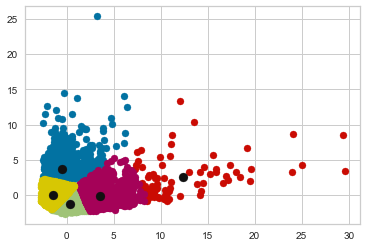

In [38]:
u_labels = np.unique(labels_kmeans_pca)
plotting_k(u_labels,centroids_pca,labels_kmeans_pca,reduced_X)

**Agglomerative_pca**

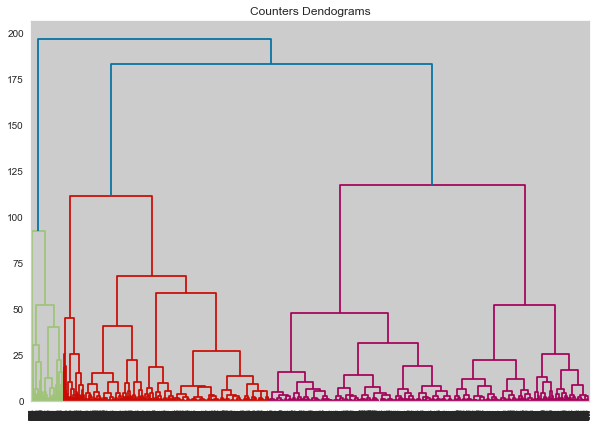

In [39]:
dend=dendo(reduced_X,'ward','euclidean')

In [40]:
y_hc_pca=Agglomerative(3,'ward','euclidean',reduced_X)
print(Counter(y_hc_pca))
silhouette_score(reduced_X, y_hc_pca, metric='euclidean')

Counter({0: 5131, 2: 3284, 1: 535})


0.3592583953191878

**DBSCAN_pca**

In [53]:
dbscan(reduced_X)
# eps is 1.8, min_sam is 25
# silhouette_score:0.7946141352739808

eps is 1.5, min_sam is 25 
Counter({0: 8870, -1: 80})
0.7673429034421235


eps is 1.5, min_sam is 26 
Counter({0: 8868, -1: 82})
0.7657091230266202


eps is 1.5, min_sam is 27 
Counter({0: 8867, -1: 83})
0.7652193886227091


eps is 1.5, min_sam is 28 
Counter({0: 8867, -1: 83})
0.7652193886227091


eps is 1.5, min_sam is 29 
Counter({0: 8866, -1: 84})
0.7640926893687435


eps is 1.5, min_sam is 30 
Counter({0: 8864, -1: 86})
0.763213551102339


eps is 1.5, min_sam is 31 
Counter({0: 8862, -1: 88})
0.7619190317113054


eps is 1.5, min_sam is 32 
Counter({0: 8858, -1: 92})
0.7582785129453617


eps is 1.5, min_sam is 33 
Counter({0: 8854, -1: 96})
0.7567089524759304


eps is 1.5, min_sam is 34 
Counter({0: 8854, -1: 96})
0.7567089524759304


eps is 1.5, min_sam is 35 
Counter({0: 8852, -1: 98})
0.755767262252078


eps is 1.5, min_sam is 36 
Counter({0: 8851, -1: 99})
0.7552941631663045


eps is 1.5, min_sam is 37 
Counter({0: 8850, -1: 100})
0.7548097623784623


eps is 1.5, min_sam is 38 

KeyboardInterrupt: 

In [82]:
def plot_db(eps,min_samples,d):
    clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(d)

    p = sns.scatterplot(data = d, x = d['PCA1'], y = d['PCA2'], hue = clusters.labels_, legend = "full", palette = "tab10")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()

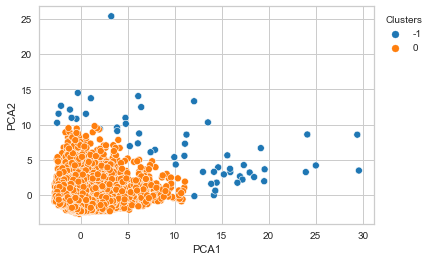

In [83]:
plot_db(1.8,25,reduced_X)

**Gaussian_Mixture_pca**

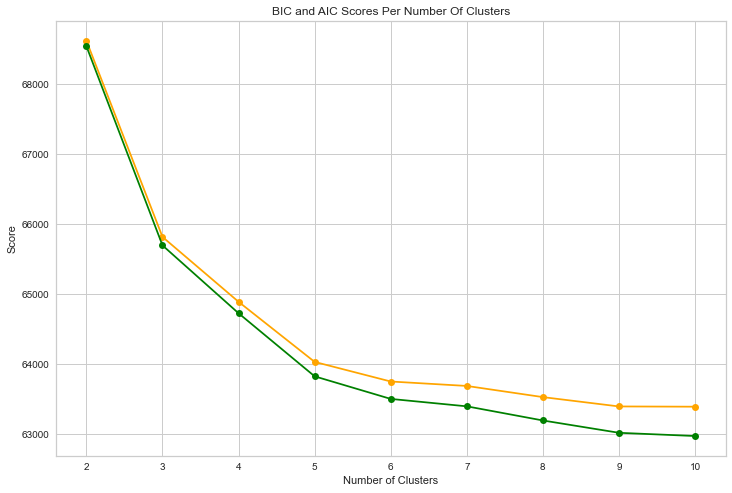

In [57]:
gaussian_mixture_k(reduced_X)

In [76]:
labels_pca=gaussian_mixture(reduced_X,5)

Counter({2: 3691, 1: 2792, 3: 1196, 0: 1054, 4: 217})
0.3545109351517012


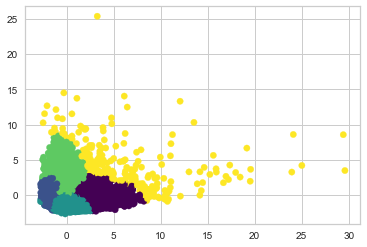

In [80]:
plt.scatter(reduced_X.PCA1, reduced_X.PCA2, c=labels_pca, s=40, cmap='viridis')